# Introduction
<p> In this file we will be doing basics exploratory data analysis on the data compiled from both ETLs </p>

In [2]:
# Generic Imports
import pandas as pd

# Data Imports
import matplotlib.pyplot as plt
import seaborn as sns

We want to read both CSV files created in TMDB-ETL, then combine them

In [9]:
df00 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz', compression = 'gzip', low_memory = False).drop(index = 0)
df01 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz', compression = 'gzip', low_memory = False).drop(index = 0)

# conct them

df = pd.concat([df00, df01])

Let's do some EDA

In [23]:
finance_df = df[(df['revenue'] > 0) | (df['budget'] > 0)]
print(f"There are {finance_df.shape[0]} movies with financial info.")

There are 616 movies with financial info.


View average revenue by certification category

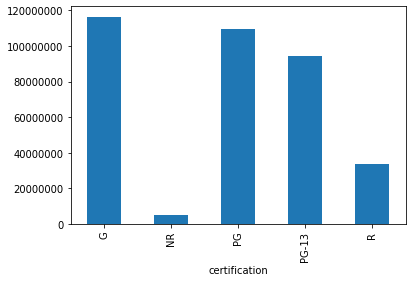

In [30]:
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')
finance_df.groupby('certification')['revenue'].mean().plot.bar();

View average budget by certification category

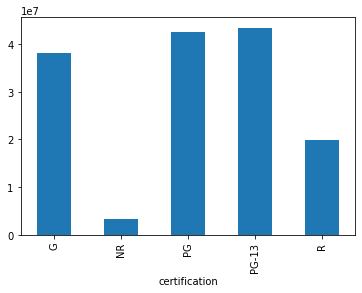

In [32]:
finance_df.groupby('certification')['budget'].mean().plot.bar();

Save our merged dataframe to a compressed CSV

In [ ]:
df.to_csv("Data/tmdb_results_combined.csv.gz", compression="gzip", index=False)